In [1]:
%load_ext autoreload
%autoreload 2

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
from covid_alberta import albertaC19_webscraper
import requests
from bs4 import BeautifulSoup
import json

In [7]:
covid_url = 'https://covid19stats.alberta.ca/'
page = requests.get(covid_url)
soup = BeautifulSoup(page.content, 'html.parser')

In [29]:
results = soup.find(id='cases')
totals_results = results.find_all('script')
ab_cumulative = json.loads(totals_results[0].string)
ab_status = json.loads(totals_results[1].string)
ab_daily = json.loads(totals_results[3].string)
ab_tests = 

In [61]:
test_results = soup.find(id='laboratory-testing')
test_scripts = test_results.find_all('script')
result_dict = json.loads(test_scripts[0].string)
len(test_scripts)

1

In [13]:
len(totals_results)

4

In [34]:
daily_data = dict()
for data in ab_daily['x']['data']:
    daily_data[data['name']] = {'date': data['x'], '{0}_count'.format(data['name']): data['y']}


In [38]:
daily_data.keys()

dict_keys(['Confirmed', 'Probable'])

In [39]:
status_data = dict()
for data in ab_status['x']['data']:
    status_data[data['name']] = {'date': data['x'], '{0}_cum'.format(data['name']): data['y']}
len(status_data)

3

In [40]:
status_data.keys()

dict_keys(['Active', 'Died', 'Recovered'])

In [25]:
ab_status['x']['data']

[{'x': ['2020-03-07',
   '2020-03-14',
   '2020-03-18',
   '2020-03-19',
   '2020-03-20',
   '2020-03-21',
   '2020-03-22',
   '2020-03-23',
   '2020-03-24',
   '2020-03-25',
   '2020-03-26',
   '2020-03-27',
   '2020-03-28',
   '2020-03-29',
   '2020-03-30',
   '2020-03-31',
   '2020-04-01',
   '2020-04-02',
   '2020-04-03',
   '2020-04-04',
   '2020-04-05',
   '2020-04-06',
   '2020-04-07'],
  'type': 'scatter',
  'mode': 'lines+markers',
  'y': [0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   1,
   15,
   40,
   89,
   136,
   161,
   208,
   334,
   447,
   577,
   650,
   704,
   762,
   797,
   900],
  'name': 'Active',
  'marker': {'color': 'rgba(212,0,114,1)',
   'line': {'color': 'rgba(212,0,114,1)'}},
  'textfont': {'color': 'rgba(212,0,114,1)'},
  'error_y': {'color': 'rgba(212,0,114,1)'},
  'error_x': {'color': 'rgba(212,0,114,1)'},
  'line': {'color': 'rgba(212,0,114,1)'},
  'xaxis': 'x',
  'yaxis': 'y',
  'frame': None},
 {'x': ['2020-03-07',
   '2020-03-14',
   '2020-03-

In [42]:
class_list = []
for tag in soup.findAll("div"):
    #print(tag.attrs, tag.attrs.keys(), list(tag.attrs.keys())[0])
    if list(tag.attrs.keys())[0] == 'class':
        class_list.append(tag.attrs)
class_list

[{'class': ['container-fluid', 'main-container']},
 {'class': ['fluid-row'], 'id': 'header'},
 {'class': ['figure']},
 {'class': ['figure']},
 {'class': ['figure']},
 {'class': ['figure']},
 {'class': ['figure']},
 {'class': ['figure']},
 {'class': ['figure']},
 {'class': ['figure']},
 {'class': ['figure']},
 {'class': ['figure']},
 {'class': ['figure']},
 {'class': ['figure']}]

In [50]:
find_result = False
for tag in soup.findAll('div', {"class":"level2"}):
    if tag.attrs: find_result = True
    print(tag.attrs)
if not find_result:
    print('unable to find tag')

{'id': 'highlights', 'class': ['section', 'level2', 'unnumbered']}
{'id': 'cases', 'class': ['section', 'level2', 'unnumbered']}
{'id': 'characteristics', 'class': ['section', 'level2', 'unnumbered']}
{'id': 'severe-outcomes', 'class': ['section', 'level2', 'unnumbered']}
{'id': 'geospatial', 'class': ['section', 'level2', 'unnumbered']}
{'id': 'laboratory-testing', 'class': ['section', 'level2', 'unnumbered']}
{'id': 'data-export', 'class': ['section', 'level2', 'unnumbered']}
{'id': 'data-notes', 'class': ['section', 'level2', 'unnumbered']}


In [47]:
temp_dict = {'a': 1}
tdict2 = {'a': 2, 'c': 3}
temp_dict.update(None)
temp_dict

TypeError: 'NoneType' object is not iterable

In [33]:
for tag in soup.findAll('div', {"id":"data-export"}):
    print(tag.attrs)

{'id': 'data-export', 'class': ['section', 'level2', 'unnumbered']}


In [59]:
results = soup.find(id='cases')
totals_results = results.find_all('script')
#totals_results

In [44]:
test = None
if test:
    print('what')

In [74]:
abC19scaper = albertaC19_webscraper()
abTotal, abRegion, abTesting = abC19scaper.scrape_all(return_dataframes=True)

In [75]:
abTotal.tail()

,cum_cases,Confirmed_count,Probable_count,Daily_count,Active_cum,Died_cum,Recovered_cum
2020-04-03,1200,38,36,74,650,19,267
2020-04-04,1258,38,20,58,704,24,319
2020-04-05,1316,35,23,58,762,24,380
2020-04-06,1351,20,15,35,797,26,447
2020-04-07,1373,9,13,22,900,26,447


In [76]:
abRegion.tail()

,Calgary_newCases,Central_newCases,Edmont_newCases,North_newCases,South_newCases,Unknown_newCases
2020-04-03,751,60,301,68,18,2
2020-04-04,782,61,315,79,19,2
2020-04-05,805,65,340,83,21,2
2020-04-06,825,65,348,89,22,2
2020-04-07,835,66,358,90,22,2


In [77]:
abTesting.tail()

,test_count
2020-04-03,1532
2020-04-04,1740
2020-04-05,1113
2020-04-06,1131
2020-04-07,247


In [4]:
abC19scaper.print_html_class_ids()

{'id': 'highlights', 'class': ['section', 'level2', 'unnumbered']}
{'id': 'cases', 'class': ['section', 'level2', 'unnumbered']}
{'id': 'characteristics', 'class': ['section', 'level2', 'unnumbered']}
{'id': 'severe-outcomes', 'class': ['section', 'level2', 'unnumbered']}
{'id': 'geospatial', 'class': ['section', 'level2', 'unnumbered']}
{'id': 'laboratory-testing', 'class': ['section', 'level2', 'unnumbered']}
{'id': 'data-export', 'class': ['section', 'level2', 'unnumbered']}
{'id': 'data-notes', 'class': ['section', 'level2', 'unnumbered']}
Here are the class id's we are currently using for this scraper:
{'totals': 'case', 'regions': 'geospatial', 'testing': 'laboratory-testing'}


True

In [3]:
def calculate_cumulatives(df:pd.DataFrame, filter_suffix:str='newCases', col_suffix:str='cumCases', combine_df:bool=True):
    '''
    take the dataframe and calculate the cumulative cases. Will only select columns with
    the base key in the column name. returns a new dataframe
    
    Parameters:
        df:pd.DataFrame
            the dataframe contaning the new cases data
        filter_suffix:str
            the string to use for filtering the dataframe using pd.DataFrame.filter(like=like_filter)
        col_suffix:str
            will use like_filter and old column names to determine the new cumulative column name
            for example would find Cal_newCases and determine new column should be Cal_cumCases
        combine_df:bool
            if True will return a new dataframe with the cumulative data joined with the old dataframe
            if False will only return a dataframe with the cumulative data
            
    Returns:
        cum_df:pd.DataFrame
            new dataframe 
    '''
    filtered_df = df.filter(like=filter_suffix)
    # create map for new columns
    filt_cols = filtered_df.columns.to_list()
    new_cols = [col.replace(filter_suffix, col_suffix) for col in filt_cols]
    col_dict = dict(zip(filt_cols, new_cols))
    # make new dataframe
    cum_df = filtered_df.cumsum()
    cum_df.rename(columns=col_dict, inplace=True)
    if combine_df:
        return df.join(cum_df)
    return cum_df

In [4]:
# increase33 = int(np.ceil(cum_data.iloc[old_idx]['cumsum'] * 1.33))

In [5]:
def calculate_doublingtimes_region(df:pd.DataFrame, col_suffix:str='cumCases',
                                   median_incubation_period:float=5.2, combine_df=True):
    '''
    given a dataframe look through and calculate the doubling times. Both doubling time based
    on the first occurance of covid-19 and doubling time based on a rolling window which 
    looks back as far as the median incubation period (converted to integer using ceiling)
    
    Parameters:
        df: pd.DataFrame
            the dataframe containing the region data
        col_suffix:str
            cumulative column suffix used to filter the dataframe to only grab cumulative data
            uses pd.DataFrame.filter(like=col_suffix)
        combine_df:bool
            if True will return a new dataframe with the doubling time data joined with the old dataframe
            if False will only return a dataframe with the doubling time data
    Return:
        regionDF_doublingtime: DataFrame
    '''
    median_incub_prd = np.ceil(median_incubation_period)
    filtered_df = df.filter(like=col_suffix)
    doubling_time = dict()
    for label, cum_data in filtered_df.iteritems():
        start_idx = cum_data.to_numpy().nonzero()[0][0] # assumes date is used as df index
        min_idx_rw = start_idx + median_incub_prd
        start_cases = cum_data.iloc[start_idx]
        start_date = cum_data.index[start_idx]
        
        dt_values = [0]
        dt_key = label.replace(col_suffix, 'dtime')
        dt_rw_values = [0]
        dt_rw_key = label.replace(col_suffix, 'dtime_rw')
        
        for idx in range(1, len(cum_data)):
            old_idx = idx - 1

            new_cases = cum_data.iloc[idx]
            new_date = cum_data.index[idx]
            old_cases = cum_data.iloc[old_idx]

            # calculate the doubling time
            t_delta = new_date - start_date
            c_delta = new_cases / start_cases
            
            dtime = 0 # default
            if c_delta > 1: # log(1) = 0, log(x) with x: 0 < x > 1 is equal to a negative number
                dtime = ( t_delta.days * np.log(2) ) / ( np.log(c_delta))
            dt_values.append(dtime)
            
            # Rolling window calculation
            dtime_rw = 0 # default
            if idx >= min_idx_rw:
                idx_rw = idx - 6
                old_cases_rw = cum_data.iloc[idx_rw]
                old_date_rw = cum_data.index[idx_rw]
                # calculate the doubling time
                t_delta_rw = new_date - old_date_rw
                c_delta_rw = new_cases / old_cases_rw
                if c_delta_rw > 1: # log(1) = 0, log(x) with x: 0 < x > 1 is equal to a negative number
                    dtime_rw = ( t_delta_rw.days * np.log(2) ) / ( np.log(c_delta_rw))
            dt_rw_values.append(dtime_rw)
            
        doubling_time[dt_key] = dt_values
        doubling_time[dt_rw_key] = dt_rw_values
    df_dt = pd.DataFrame(doubling_time, index=filtered_df.index)
    if combine_df:
        return df.join(df_dt)
    return df_dt

In [6]:
region_cum = calculate_cumulatives(abRegion, combine_df=False)
region_dt = calculate_doublingtimes_region(region_cum, combine_df=False)
total_dt = calculate_doublingtimes_region(abTotal, col_suffix='cum_cases', combine_df=False)

In [7]:
print(region_cum.columns.to_list())
print(abTotal.columns.to_list())

['Calgary_cumCases', 'Central_cumCases', 'Edmont_cumCases', 'North_cumCases', 'South_cumCases', 'Unknown_cumCases']
['new_cases', 'cum_cases']


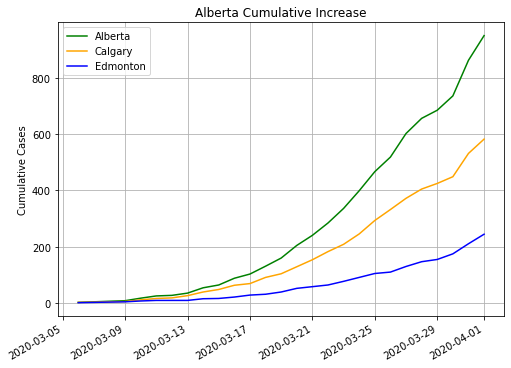

In [8]:
fig, ax = plt.subplots(figsize=(8,6))
days_to_trim = 1
abTotal['cum_cases'][:-days_to_trim].plot(ax=ax, label='Alberta', c='green')
region_cum['Calgary_cumCases'][:-days_to_trim].plot(ax=ax, label='Calgary', c='orange')
region_cum['Edmont_cumCases'][:-days_to_trim].plot(ax=ax, label='Edmonton', c='blue')

ax.grid(which='both')
ax.set_ylabel('Cumulative Cases')
ax.set_title('Alberta Cumulative Increase')
ax.legend()
fig.savefig('images/AlbertaCumIncrease.png', bbox_inches='tight')

In [15]:
c_ab, c_calg, c_edm = 'green', 'orange', 'blue'
ln_width = 2
days_to_trim = 1
fig = go.Figure()
fig.add_trace(go.Scatter(x=abTotal['cum_cases'].index.to_list(), y=abTotal['cum_cases'][:-days_to_trim],
                         mode='lines+markers', line=dict(color=c_ab, width=ln_width),
                         name='Alberta'))
fig.add_trace(go.Scatter(x=region_cum['Calgary_cumCases'][:-days_to_trim].index.to_list(), y=region_cum['Calgary_cumCases'][:-days_to_trim],
                         mode='lines+markers', line=dict(color=c_calg, width=ln_width),
                         name='Calgary'))
fig.add_trace(go.Scatter(x=region_cum['Edmont_cumCases'][:-days_to_trim].index.to_list(), y=region_cum['Edmont_cumCases'][:-days_to_trim],
                         mode='lines+markers', line=dict(color=c_edm, width=ln_width),
                         name='Edmonton'))
fig.write_html('plotly_test.html')

In [9]:
print(region_dt.columns.to_list())
print(total_dt.columns.to_list())

['Calgary_dtime', 'Calgary_dtime_rw', 'Central_dtime', 'Central_dtime_rw', 'Edmont_dtime', 'Edmont_dtime_rw', 'North_dtime', 'North_dtime_rw', 'South_dtime', 'South_dtime_rw', 'Unknown_dtime', 'Unknown_dtime_rw']
['dtime', 'dtime_rw']


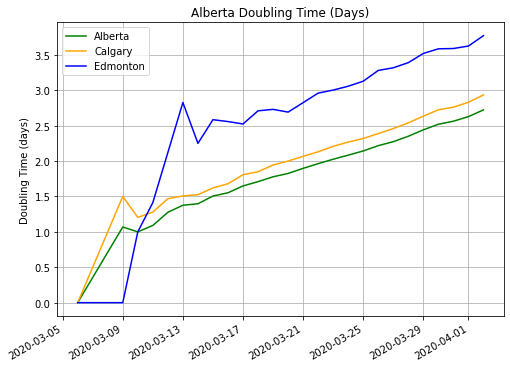

In [26]:
fig, ax = plt.subplots(figsize=(8,6))
total_dt['dtime'].plot(ax=ax, label='Alberta', c='green')
region_dt['Calgary_dtime'].plot(ax=ax, label='Calgary', c='orange')
region_dt['Edmont_dtime'].plot(ax=ax, label='Edmonton', c='blue')

ax.legend()
ax.grid(which='both')
ax.set_ylabel('Doubling Time (days)')
ax.set_title('Alberta Doubling Time (Days)')
fig.savefig('images/AlbertaDTimeIncrease.png', bbox_inches='tight')

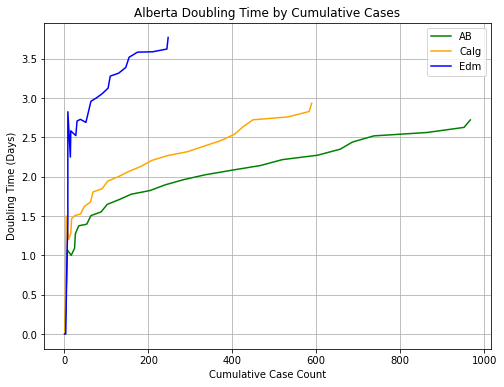

In [11]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(abTotal['cum_cases'].values, total_dt['dtime'].values, 
        c='green', label='AB')
ax.plot(region_cum['Calgary_cumCases'].values, region_dt['Calgary_dtime'].values, 
        c='orange', label='Calg')
ax.plot(region_cum['Edmont_cumCases'].values, region_dt['Edmont_dtime'].values, 
        c='blue', label='Edm')
ax.grid(which='both')
ax.legend()
ax.set_ylabel('Doubling Time (Days)')
ax.set_xlabel('Cumulative Case Count')
ax.set_title("Alberta Doubling Time by Cumulative Cases")
fig.savefig('images/AlbertaDTimeIncrease_byCaseCount.png', bbox_inches='tight')

In [12]:
ab_date = abTotal['cum_cases'].index[-2].month_name() + ' ' + str(abTotal['cum_cases'].index[-2].day)
ab_cases = abTotal['cum_cases'][-2]
ab_dt = total_dt['dtime_rw'][-2]
ab_dt

6.8553641060028925

Text(0.5, 1.0, 'Alberta: 6 Day Rolling Window - Doubling Time by Cumulative Cases')

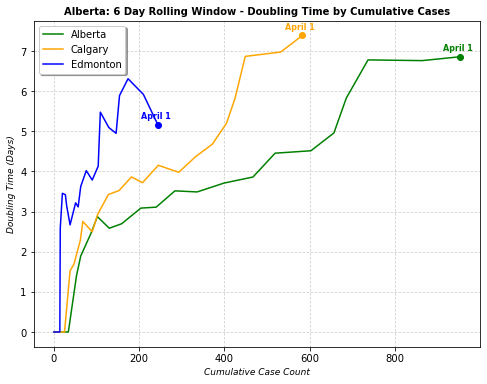

In [22]:
days_to_trim = 1
trim = days_to_trim + 1
fig, ax = plt.subplots(figsize=(8,6))
c_ab, c_calg, c_edm = 'green', 'orange', 'blue'

ax.plot(abTotal['cum_cases'].values[:-days_to_trim], total_dt['dtime_rw'].values[:-days_to_trim], 
        c=c_ab, label='Alberta')
ax.plot(region_cum['Calgary_cumCases'].values[:-days_to_trim], region_dt['Calgary_dtime_rw'].values[:-days_to_trim], 
        c=c_calg, label='Calgary')
ax.plot(region_cum['Edmont_cumCases'].values[:-days_to_trim], region_dt['Edmont_dtime_rw'].values[:-days_to_trim], 
        c=c_edm, label='Edmonton')

# annotate Alberta
ab_date = abTotal['cum_cases'].index[-trim].month_name() + ' ' + str(abTotal['cum_cases'].index[-trim].day)
ab_cases = abTotal['cum_cases'][-trim]
ab_dt = total_dt['dtime_rw'][-trim]
ax.plot([ab_cases], [ab_dt], 'o', c=c_ab)
ax.text(ab_cases - 40, ab_dt + 0.15, ab_date, 
        fontdict={'color': c_ab, 'size': 8, 'weight': 'bold'})
# annotate Calgary
cal_date = region_cum['Calgary_cumCases'].index[-trim].month_name() + ' ' + str(region_cum['Calgary_cumCases'].index[-trim].day)
cal_cases = region_cum['Calgary_cumCases'][-trim]
cal_dt = region_dt['Calgary_dtime_rw'][-trim]
ax.plot([cal_cases], [cal_dt], 'o', c=c_calg)
ax.text(cal_cases - 40, cal_dt + 0.15, cal_date, 
        fontdict={'color': c_calg, 'size': 8, 'weight': 'bold'})
# annotate Edmonton
edm_date = region_cum['Edmont_cumCases'].index[-trim].month_name() + ' ' + str(region_cum['Edmont_cumCases'].index[-trim].day)
edm_cases = region_cum['Edmont_cumCases'][-trim]
edm_dt = region_dt['Edmont_dtime_rw'][-trim]
ax.plot([edm_cases], [edm_dt], 'o', c=c_edm)
ax.text(edm_cases - 40, edm_dt + 0.15, edm_date, 
        fontdict={'color': c_edm, 'size': 8, 'weight': 'bold'})
# fancy up the plot
ax.grid(which='both', linestyle=(0, (5, 3)), lw=0.5)
ax.legend(frameon=True, fancybox=True, shadow=True)
ax.set_ylabel('Doubling Time (Days)', fontdict={'size': 9, 'family': 'sans-serif', 'style':'italic'})
ax.set_xlabel('Cumulative Case Count', fontdict={'size': 9, 'family': 'sans-serif', 'style':'italic'})
ax.set_title("Alberta: 6 Day Rolling Window - Doubling Time by Cumulative Cases",
             fontdict={'fontsize': 10, 'family': 'sans-serif', 'fontweight': 'bold'})
#fig.savefig('images/AlbertaDTimeIncreaseRW_byCaseCount.png', bbox_inches='tight')

In [27]:
ab_dt

6.8553641060028925

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
covid.groupby(['Zone']).get_group('Edmonton').plot(y='dtime', 
                                                   x='cumsum', 
                                                   ax=ax, 
                                                   label="YEG doubling time",
                                                   color='blue')
covid.groupby(['Zone']).get_group('Calgary').plot(y='dtime', 
                                                  x='cumsum', 
                                                  ax=ax, 
                                                  label="Calgary doubling time",
                                                  color='green')
# totals.plot(y='dtime', x='Date',  ax=ax, 
#             label="Alberta doubling time", color='cyan')

ax.grid(which='both')
ax.set_title('Alberta Doubling Time (Days)')
fig.savefig('AlbertaDTimeIncrease_byCaseCount.png', bbox_inches='tight')

In [ ]:
covid.to_csv('covid_analysis.csv')